In [2]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


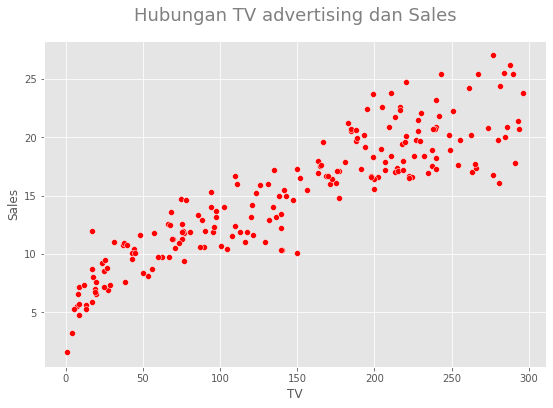

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(9, 6))

sns.scatterplot(x='TV', y = 'Sales', data=df, ax=ax, color='red')

ax.set_title('Hubungan TV advertising dan Sales', pad=20, size=18, color='gray')

plt.savefig('/content/drive/My Drive/Colab Notebooks/manual_scaterplot.png')

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


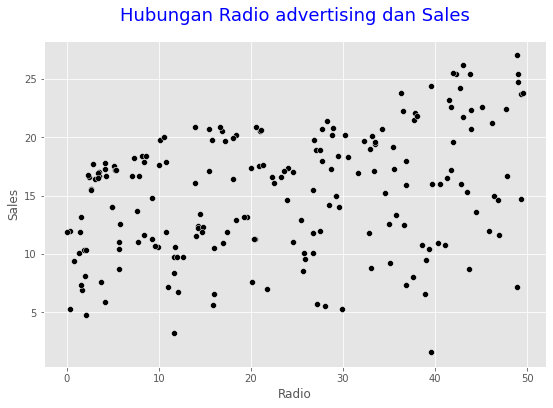

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(9, 6))

sns.scatterplot(x='Radio', y = 'Sales', data=df, ax=ax, color='black')

ax.set_title('Hubungan Radio advertising dan Sales', pad=20, size=18, color='blue')

plt.savefig('/content/drive/My Drive/Colab Notebooks/manual_scaterplot2.png')

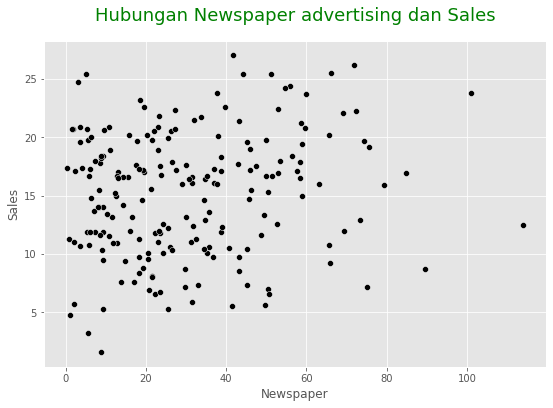

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(9, 6))

sns.scatterplot(x='Newspaper', y = 'Sales', data=df, ax=ax, color='black')

ax.set_title('Hubungan Newspaper advertising dan Sales', pad=20, size=18, color='green')

plt.savefig('/content/drive/My Drive/Colab Notebooks/manual_scaterplot3.png')

**Dilihat dari grafik maka kasus linear regression yang tepat antara tv dengan sales**

In [9]:
df=df.drop(columns=['Newspaper','Radio'],axis=1)

In [10]:
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


In [31]:
m = df['Sales'].values.size
n = df['TV'].values.size

In [32]:
m,n

(200, 200)

COST FUNCTION : 
$J(\theta_{0}, \theta_{1}) = \frac{1}{2m} \sum_{i = 1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^{2}$

In [33]:
def cost_function(x, y, theta):
    y_pred = np.dot(x, theta)
    sqrd_error = (y_pred - y) ** 2
    cost = 1 / (2 * m) * np.sum(sqrd_error)
    
    return cost

In [34]:
x = np.append(np.ones((m, 1)), df['TV'].values.reshape(m, 1), axis=1)
x

array([[  1. , 230.1],
       [  1. ,  44.5],
       [  1. ,  17.2],
       [  1. , 151.5],
       [  1. , 180.8],
       [  1. ,   8.7],
       [  1. ,  57.5],
       [  1. , 120.2],
       [  1. ,   8.6],
       [  1. , 199.8],
       [  1. ,  66.1],
       [  1. , 214.7],
       [  1. ,  23.8],
       [  1. ,  97.5],
       [  1. , 204.1],
       [  1. , 195.4],
       [  1. ,  67.8],
       [  1. , 281.4],
       [  1. ,  69.2],
       [  1. , 147.3],
       [  1. , 218.4],
       [  1. , 237.4],
       [  1. ,  13.2],
       [  1. , 228.3],
       [  1. ,  62.3],
       [  1. , 262.9],
       [  1. , 142.9],
       [  1. , 240.1],
       [  1. , 248.8],
       [  1. ,  70.6],
       [  1. , 292.9],
       [  1. , 112.9],
       [  1. ,  97.2],
       [  1. , 265.6],
       [  1. ,  95.7],
       [  1. , 290.7],
       [  1. , 266.9],
       [  1. ,  74.7],
       [  1. ,  43.1],
       [  1. , 228. ],
       [  1. , 202.5],
       [  1. , 177. ],
       [  1. , 293.6],
       [  1

In [35]:
xx=df['Sales'].values
y = df['Sales'].values.reshape(m, 1)



In [36]:
theta = np.zeros((2, 1))

theta


array([[0.],
       [0.]])

In [37]:
theta.shape


(2, 1)

**COST FUNCTION**

$J(\theta_{0}, \theta_{1}) = \frac{1}{2m} \sum_{i = 1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^{2}$

In [38]:
def cost_function(x, y, theta):
    y_pred = np.dot(x, theta)
    sqrd_error = (y_pred - y) ** 2
    cost = 1 / (2 * m) * np.sum(sqrd_error)
    
    return cost


In [39]:
cost_function(x, y, theta)


128.355975


Gradient Descent

$\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum_{i = 1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})$

$\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum_{i = 1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})\ . x^{(i)}$



In [40]:
def gradient_descent(x, y, theta, alpha, iter):
    costs = []
    
    for i in range(iter):
        y_pred = np.dot(x, theta)
        
        
        der = np.dot(x.transpose(), (y_pred - y)) / m
        theta -= alpha * der
        costs.append(cost_function(x, y, theta))
        
    return theta, costs

In [41]:
import sys
from time import sleep
from tqdm import tqdm

values = range(3)
with tqdm(total=len(values), file=sys.stdout) as pbar:
    for i in values:
        pbar.set_description('processed: %d' % (1 + i))
        pbar.update(1)
        sleep(1)

processed: 3: 100%|██████████| 3/3 [00:03<00:00,  1.00s/it]


In [42]:
theta, costs = gradient_descent(x, y, theta, alpha=0.000038, iter=4000000)


In [43]:
costs[-1]

2.6088719488975642

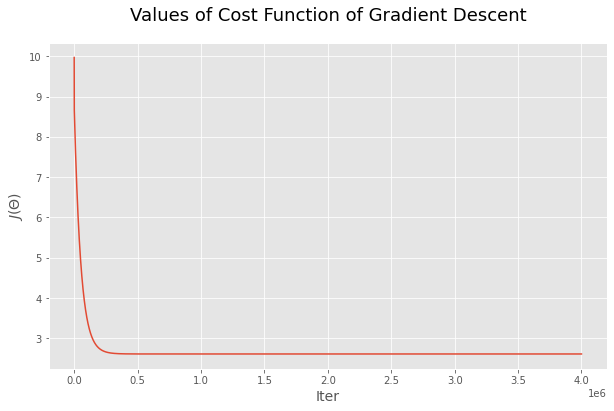

In [44]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.plot(costs)

ax.set_title("Values of Cost Function of Gradient Descent", pad=22, size=18, color='black')
ax.set_xlabel("Iter", size=14)
ax.set_ylabel("$J(\Theta)$", size=14)
plt.savefig('/content/drive/My Drive/Colab Notebooks/manual_cost_and_iteration.png')

In [45]:
theta


array([[6.97482149],
       [0.05546477]])

In [46]:
y_pred = np.dot(x, np.round(theta, 3))

dic = {'Sales (Actual)': y.flatten(),
       'Sales (Predicted)': np.round(y_pred, 1).flatten()}

df1 = pd.DataFrame(dic)

In [47]:
df1.head(100)


,Sales (Actual),Sales (Predicted)
0,22.1,19.6
1,10.4,9.4
2,12.0,7.9
3,16.5,15.3
4,17.9,16.9
...,...,...
95,16.9,16.0
96,16.7,17.8
97,20.5,17.1
98,25.4,22.9


<Figure size 1440x720 with 0 Axes>

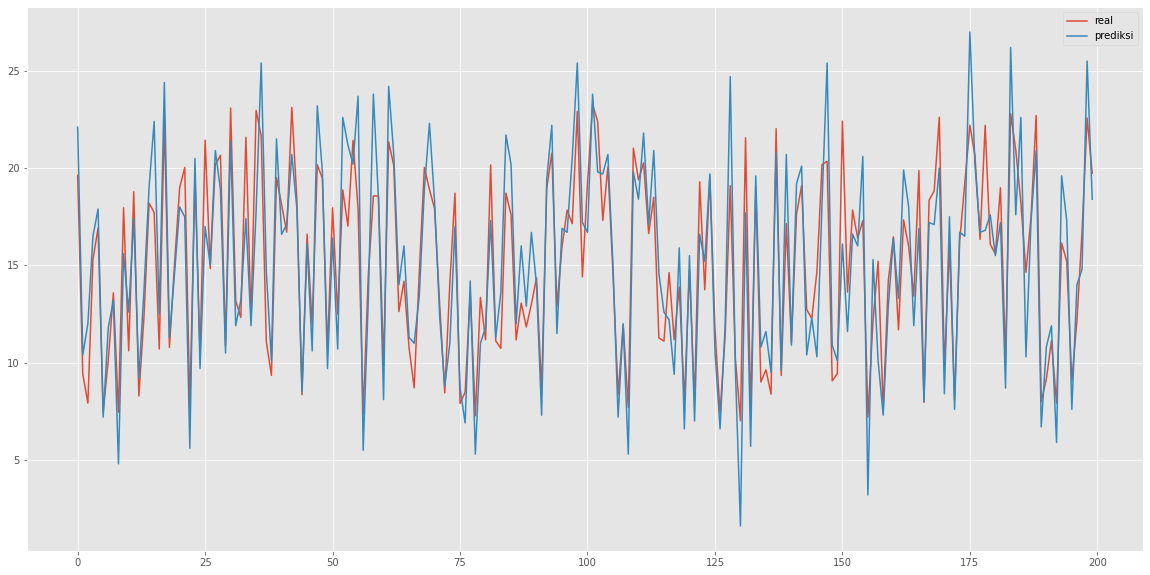

In [48]:
plt.rcParams["figure.figsize"] = (20,10)

df4 = pd.DataFrame({'prediksi': y.flatten() , 'real': y_pred.flatten() }, columns=['real', 'prediksi'])
   
plt.figure()

df4.plot.line()

In [49]:
def predict(tv_ads):
    x = np.array([1, tv_ads]).reshape(1, 2)
    y_pred = np.dot(x, theta)
    
    return y_pred[0, 0]

In [50]:
predict(17.2)


7.928815540264196

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


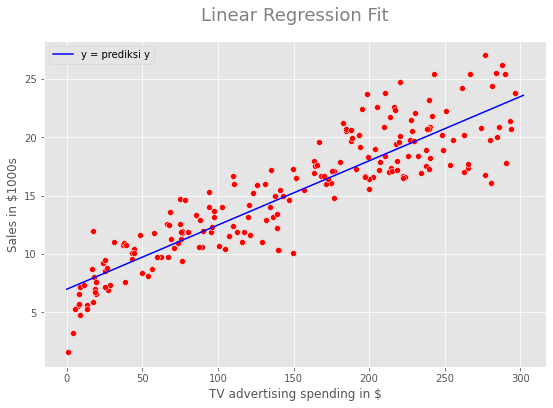

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x='TV', y='Sales', data=df, ax=ax, color='red')

# Create random data based on theta and x value
a = np.round(theta, 3)
x_value = np.array(range(0, 303))
# theta + theta * x
y_value = a[0, 0] + (a[1, 0] * x_value)


sns.lineplot(x_value, y_value, ax=ax, label='y = prediksi y', color='blue')

ax.set_title('Linear Regression Fit', pad=20, size=18, color='gray')
ax.set_xlabel('TV advertising spending in $')
ax.set_ylabel('Sales in $1000s')
ax.legend(loc='upper left')
plt.savefig('manual_linear_regression_fit.png')

In [52]:
R_squared = 0.9 ** 2
MSE = ((y - y_pred) ** 2).sum() / m
RMSE = np.sqrt(MSE)
print('R^2: ', np.round(R_squared, 2))
print('RMSE: ', np.round(RMSE, 2))

R^2:  0.81
RMSE:  2.29


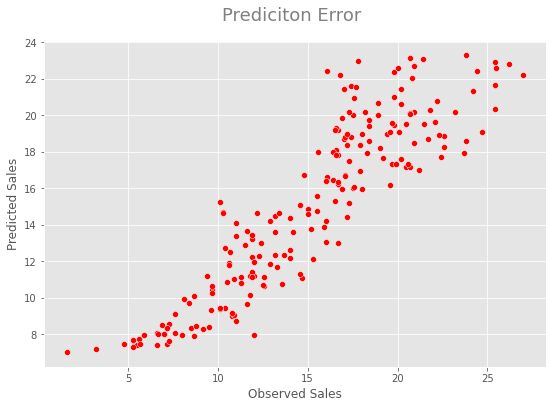

In [53]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.scatterplot(x=y.flatten(), y=y_pred.flatten(), ax=ax, color='red')

ax.set_title('Prediciton Error ', pad=20, size=18, color='gray')
ax.set_xlabel('Observed Sales')
ax.set_ylabel('Predicted Sales')
plt.savefig('/content/drive/My Drive/Colab Notebooks/manual_prediction_error.png')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


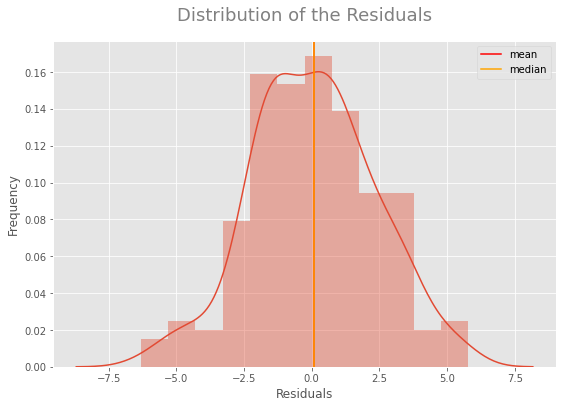

In [54]:
fig, ax = plt.subplots(figsize=(9, 6))

residuals = (y - y_pred)

sns.distplot(residuals.flatten(), ax=ax)
ax.axvline(x = np.mean(residuals), color='red', label='mean')
ax.axvline(x = np.median(residuals), color='orange', label='median')
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of the Residuals', pad=20, size=18, color='gray')
ax.legend(loc='upper right')
plt.savefig('/content/drive/My Drive/Colab Notebooks/manual_distribution_of_the_residuals.png')

**Linear Regression with Target Engineering**

In [55]:
!pip install jcopml

     |████████████████████████████████| 101 kB 4.1 MB/s 
  Created wheel for jcopml: filename=jcopml-1.1.10-py2.py3-none-any.whl size=33230 sha256=17f3ac26c1d2a225e5ee610f16a4564f40849246cf3b5bf3d6f935157195727a
  Stored in directory: /root/.cache/pip/wheels/1e/b0/7a/2e3db99fcf3707a61b80c5193e1155acc8eaf730c510424c6b
Successfully built jcopml


**LIBRARY**

In [56]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [57]:
df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/advertising.csv')
df1

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


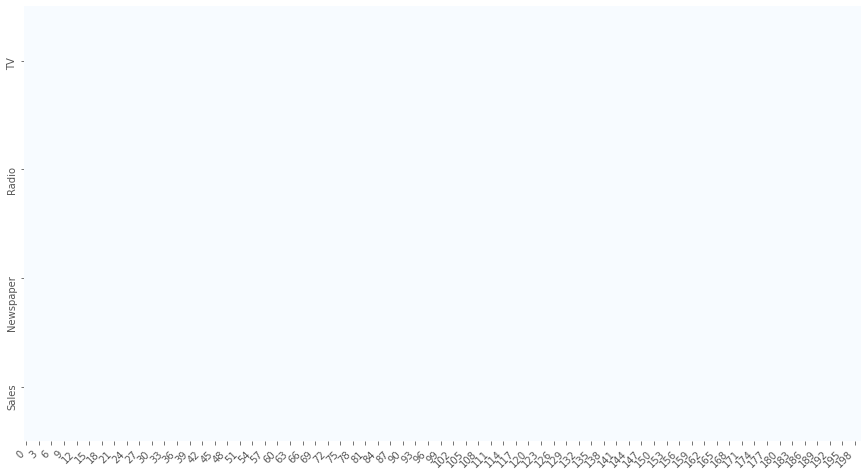

In [58]:
plot_missing_value(df1)

In [59]:
X = df1.drop(columns="Sales")
y = df1.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [60]:
X_train

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [61]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['TV']),
    
])

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [63]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LinearRegression())
])


model = RandomizedSearchCV(pipeline, rsp.linreg_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 2 is smaller than n_iter=50. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'algo__fit_intercept': True}
0.8134866044709264 0.8065982833797044 0.802561303423698


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.4s finished


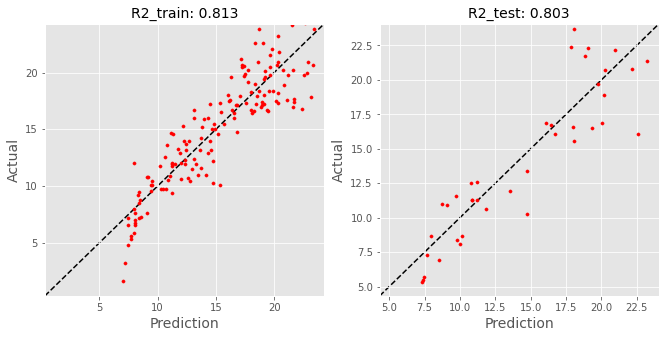

In [64]:
  from jcopml.plot import plot_actual_vs_prediction,plot_residual
  plot_actual_vs_prediction(X_train, y_train, X_test,y_test,model)

In [65]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2), ['TV']),
    
])
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LinearRegression())
])


model = RandomizedSearchCV(pipeline, rsp.linreg_poly_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'algo__fit_intercept': False, 'prep__numeric__poly__degree': 2, 'prep__numeric__poly__interaction_only': False}
0.8228971281405931 0.8141318971439103 0.8160942105168377


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.3s finished


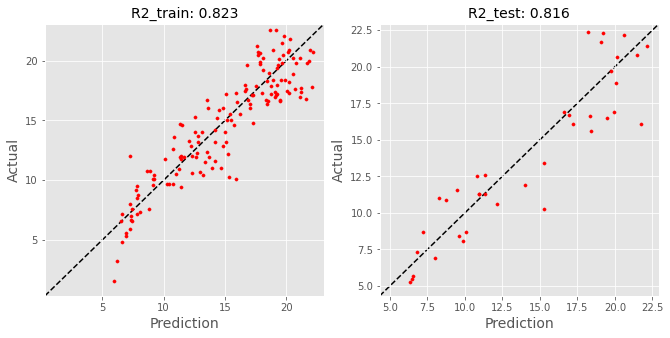

In [66]:
from jcopml.plot import plot_actual_vs_prediction,plot_residual
plot_actual_vs_prediction(X_train, y_train, X_test,y_test,model)

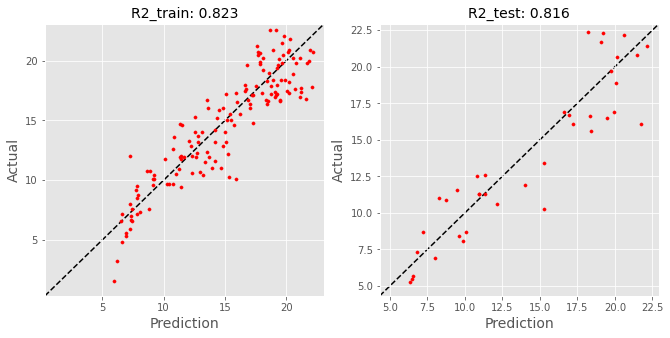

In [67]:
from jcopml.plot import plot_actual_vs_prediction,plot_residual
plot_actual_vs_prediction(X_train, y_train, X_test,y_test,model)

In [68]:
from jcopml.feature_importance import mean_score_decrease

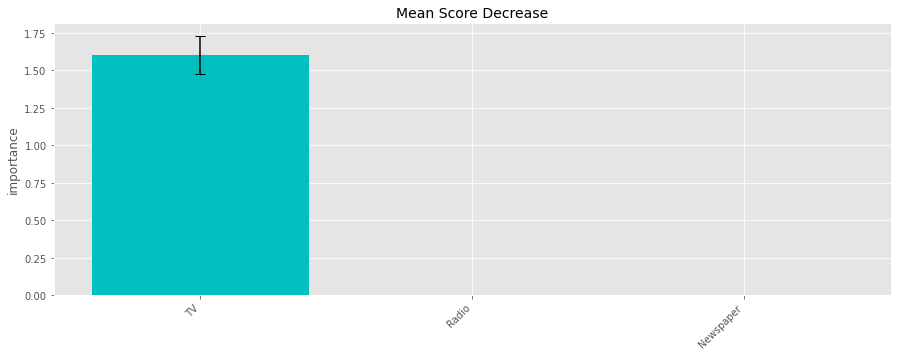

In [69]:
df_imp = mean_score_decrease(X_train,y_train, model, plot=True, topk=10)

In [70]:
def submit(model, filename="submit.csv"):
    df_submit = pd.read_csv("data/test.csv", index_col="ID")
    df_submit['Sales'] = model.predict(df_submit)
    df_submit[['Sales']].to_csv(filename, index_label='ID')

In [71]:
from sklearn.metrics import mean_squared_error, r2_score


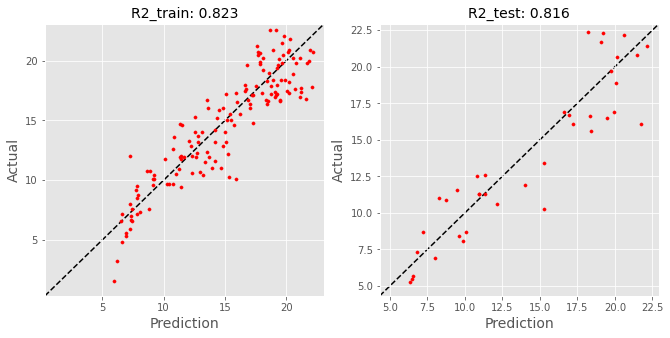

In [72]:
from jcopml.plot import plot_actual_vs_prediction,plot_residual
plot_actual_vs_prediction(X_train, y_train, X_test,y_test,model)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


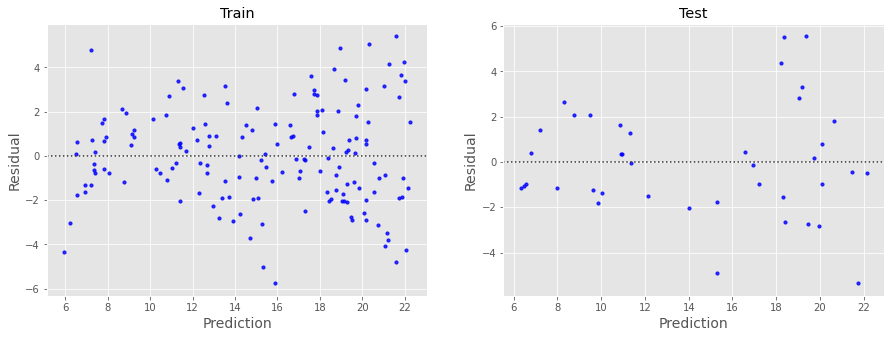

In [73]:
plot_residual(X_train, y_train, X_test,y_test,model)

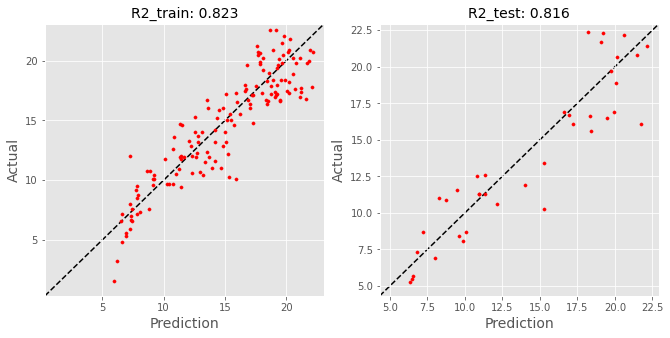

In [74]:
plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model)

In [75]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [76]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', ElasticNet())
])


model = RandomizedSearchCV(pipeline, rsp.enet_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'algo__alpha': 7.085721663941609, 'algo__fit_intercept': True, 'algo__l1_ratio': 0.015966252220214198}
0.8228625789981061 0.8142569247874913 0.8157955913019894


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.3s finished


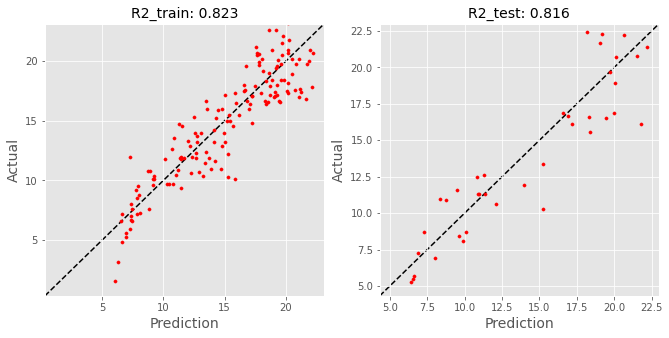

In [77]:
plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


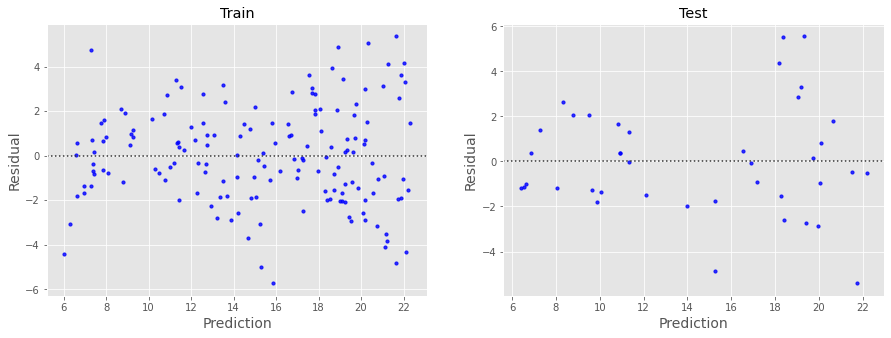

In [78]:
plot_residual(X_train, y_train, X_test,y_test,model)